In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import zipfile

In [4]:

zf = zipfile.ZipFile('/data/families.zip')
families = pd.read_csv(zf.open('Familie100m.csv'), delimiter=',', encoding="cp1252")


In [3]:
families 

,Gitter_ID_100m,Gitter_ID_100m_neu,Merkmal,Auspraegung_Code,Auspraegung_Text,Anzahl,Anzahl_q
0,100mN26912E43412,CRS3035RES100mN2691200E4341200,INSGESAMT,0,Einheiten insgesamt,3,0
1,100mN26917E43411,CRS3035RES100mN2691700E4341100,INSGESAMT,0,Einheiten insgesamt,3,0
2,100mN26917E43411,CRS3035RES100mN2691700E4341100,FAMGROESS_KLASS,1,2 Personen,3,0
3,100mN26917E43411,CRS3035RES100mN2691700E4341100,HHTYP_SENIOR_HH,2,Haushalte mit Senioren/-innen und Jüngeren,3,0
4,100mN26924E43412,CRS3035RES100mN2692400E4341200,INSGESAMT,0,Einheiten insgesamt,3,0
...,...,...,...,...,...,...,...
14327260,100mN35476E42199,CRS3035RES100mN3547600E4219900,HHTYP_SENIOR_HH,3,Haushalte ohne Senioren/-innen,3,0
14327261,100mN35476E42201,CRS3035RES100mN3547600E4220100,INSGESAMT,0,Einheiten insgesamt,4,0
14327262,100mN35476E42201,CRS3035RES100mN3547600E4220100,FAMGROESS_KLASS,1,2 Personen,3,0
14327263,100mN35476E42201,CRS3035RES100mN3547600E4220100,FAMTYP_KIND,1,Ehepaare ohne Kind,3,0


In [4]:
#read excel
translations = pd.read_excel('Data_Format_Census.xlsx', sheet_name='Translations')


In [5]:
translations

,Original,Translated
0,Merkmal,NaN
1,Auspraegung_Text,NaN
2,INSGESAMT,TOTAL
3,Einheiten insgesamt,Total
4,FAMTYP_KIND,FAMTYPE_CHILDREN
...,...,...
206,1 Wohnung,1 apartment
207,2 Wohnungen,2 apartments
208,3 - 6 Wohnungen,3 - 6 apartments
209,7 - 12 Wohnungen,7 - 12 apartments


In [6]:
#tansfrom to dictionary with original as key and translation as value
translation_dict = translations.set_index('Original')['Translated'].to_dict()
#translations_dict = dict(zip(translations['Original'], translations['Translated']))

In [7]:
families

,Gitter_ID_100m,Gitter_ID_100m_neu,Merkmal,Auspraegung_Code,Auspraegung_Text,Anzahl,Anzahl_q
0,100mN26912E43412,CRS3035RES100mN2691200E4341200,INSGESAMT,0,Einheiten insgesamt,3,0
1,100mN26917E43411,CRS3035RES100mN2691700E4341100,INSGESAMT,0,Einheiten insgesamt,3,0
2,100mN26917E43411,CRS3035RES100mN2691700E4341100,FAMGROESS_KLASS,1,2 Personen,3,0
3,100mN26917E43411,CRS3035RES100mN2691700E4341100,HHTYP_SENIOR_HH,2,Haushalte mit Senioren/-innen und Jüngeren,3,0
4,100mN26924E43412,CRS3035RES100mN2692400E4341200,INSGESAMT,0,Einheiten insgesamt,3,0
...,...,...,...,...,...,...,...
14327260,100mN35476E42199,CRS3035RES100mN3547600E4219900,HHTYP_SENIOR_HH,3,Haushalte ohne Senioren/-innen,3,0
14327261,100mN35476E42201,CRS3035RES100mN3547600E4220100,INSGESAMT,0,Einheiten insgesamt,4,0
14327262,100mN35476E42201,CRS3035RES100mN3547600E4220100,FAMGROESS_KLASS,1,2 Personen,3,0
14327263,100mN35476E42201,CRS3035RES100mN3547600E4220100,FAMTYP_KIND,1,Ehepaare ohne Kind,3,0


In [8]:
pivot_df = families.pivot(index='Gitter_ID_100m',columns=['Merkmal', 'Auspraegung_Text'], values='Anzahl')

In [9]:
pivot_df

Merkmal                    INSGESAMT FAMGROESS_KLASS  \
Auspraegung_Text Einheiten insgesamt      2 Personen   
Gitter_ID_100m                                         
100mN26912E43412                 3.0             NaN   
100mN26917E43411                 3.0             3.0   
100mN26924E43412                 3.0             3.0   
100mN26926E43410                 3.0             3.0   
100mN26927E43410                 3.0             NaN   
...                              ...             ...   
100mN35475E42200                 7.0             7.0   
100mN35475E42201                 8.0             7.0   
100mN35476E42198                 7.0             7.0   
100mN35476E42199                 4.0             3.0   
100mN35476E42201                 4.0             3.0   

Merkmal                                     HHTYP_SENIOR_HH  \
Auspraegung_Text Haushalte mit Senioren/-innen und Jüngeren   
Gitter_ID_100m                                                
100mN26912E43412                                        NaN   
100mN26917E43411                                        3.0   
100mN26924E43412                                        NaN   
100mN26926E43410                                        NaN   
100mN26927E43410                                        NaN   
...                                                     ...   
100mN35475E42200                                        3.0   
100mN35475E42201                                        NaN   
100mN35476E42198                                        NaN   
100mN35476E42199                                        NaN   
100mN35476E42201                                        NaN   

Merkmal                                        FAMTYP_KIND  \
Auspraegung_Text Alleinerziehende Mütter alle Kinder ab 18   
Gitter_ID_100m                                               
100mN26912E43412                                       NaN   
100mN26917E43411                                       NaN   
100mN26924E43412                                       3.0   
100mN26926E43410                                       NaN   
100mN26927E43410                                       NaN   
...                                                    ...   
100mN35475E42200                                       NaN   
100mN35475E42201                                       3.0   
100mN35476E42198                                       NaN   
100mN35476E42199                                       NaN   
100mN35476E42201                                       NaN   

Merkmal                         HHTYP_SENIOR_HH                FAMTYP_KIND  \
Auspraegung_Text Haushalte ohne Senioren/-innen Ehepaare mind. 1 Kind < 18   
Gitter_ID_100m                                                               
100mN26912E43412                            NaN                        NaN   
100mN26917E43411                            NaN                        NaN   
100mN26924E43412                            3.0                        NaN   
100mN26926E43410                            NaN                        NaN   
100mN26927E43410                            3.0                        NaN   
...                                         ...                        ...   
100mN35475E42200                            3.0                        NaN   
100mN35475E42201                            5.0                        NaN   
100mN35476E42198                            3.0                        NaN   
100mN35476E42199                            3.0                        NaN   
100mN35476E42201                            NaN                        NaN   

Merkmal          FAMGROESS_KLASS                FAMTYP_KIND  \
Auspraegung_Text      4 Personen Ehepaare alle Kinder ab 18   
Gitter_ID_100m                                                
100mN26912E43412             NaN                        NaN   
100mN26917E43411             NaN                        NaN   
100mN26924E43412             NaN                       

instead of replacing nan with 0, exclude these cells

In [10]:
#rename columns with trtanslation_dict
pivot_df = pivot_df.rename(columns=translation_dict)

In [11]:
pivot_df    

Merkmal          TOTAL FAMILY_SIZE                              SENIOR_STATUS  \
Auspraegung_Text Total    2 people Households with seniors and younger people   
Gitter_ID_100m                                                                  
100mN26912E43412   3.0         NaN                                        NaN   
100mN26917E43411   3.0         3.0                                        3.0   
100mN26924E43412   3.0         3.0                                        NaN   
100mN26926E43410   3.0         3.0                                        NaN   
100mN26927E43410   3.0         NaN                                        NaN   
...                ...         ...                                        ...   
100mN35475E42200   7.0         7.0                                        3.0   
100mN35475E42201   8.0         7.0                                        NaN   
100mN35476E42198   7.0         7.0                                        NaN   
100mN35476E42199   4.0         3.0                                        NaN   
100mN35476E42201   4.0         3.0                                        NaN   

Merkmal                                   FAMTYPE_CHILDREN  \
Auspraegung_Text Alleinerziehende Mütter alle Kinder ab 18   
Gitter_ID_100m                                               
100mN26912E43412                                       NaN   
100mN26917E43411                                       NaN   
100mN26924E43412                                       3.0   
100mN26926E43410                                       NaN   
100mN26927E43410                                       NaN   
...                                                    ...   
100mN35475E42200                                       NaN   
100mN35475E42201                                       3.0   
100mN35476E42198                                       NaN   
100mN35476E42199                                       NaN   
100mN35476E42201                                       NaN   

Merkmal                       SENIOR_STATUS           FAMTYPE_CHILDREN  \
Auspraegung_Text Households without seniors Ehepaare mind. 1 Kind < 18   
Gitter_ID_100m                                                           
100mN26912E43412                        NaN                        NaN   
100mN26917E43411                        NaN                        NaN   
100mN26924E43412                        3.0                        NaN   
100mN26926E43410                        NaN                        NaN   
100mN26927E43410                        3.0                        NaN   
...                                     ...                        ...   
100mN35475E42200                        3.0                        NaN   
100mN35475E42201                        5.0                        NaN   
100mN35476E42198                        3.0                        NaN   
100mN35476E42199                        3.0                        NaN   
100mN35476E42201                        NaN                        NaN   

Merkmal          FAMILY_SIZE           FAMTYPE_CHILDREN  \
Auspraegung_Text    4 people Ehepaare alle Kinder ab 18   
Gitter_ID_100m                                            
100mN26912E43412         NaN                        NaN   
100mN26917E43411         NaN                        NaN   
100mN26924E43412         NaN                        NaN   
100mN26926E43410         NaN                        NaN   
100mN26927E43410         NaN                        NaN   
...                      ...                        ...   
100mN35475E42200         NaN                        NaN   
100mN35475E42201         NaN                        NaN   
100mN35476E42198         NaN                        NaN   
100mN35476E42199         NaN                        NaN   
100mN35476E42201         NaN                        NaN   

Merkmal                                            \
Auspraegung_Text Married couples without children   
Gitter_ID_100m            

In [12]:
print(pivot_df.columns.get_level_values(0).unique())

Index(['TOTAL', 'FAMILY_SIZE', 'SENIOR_STATUS', 'FAMTYPE_CHILDREN'], dtype='object', name='Merkmal')


In [13]:
total = pivot_df['TOTAL']['Total'].sum()

In [14]:
pivot_df[['TOTAL','FAMILY_SIZE']]

Merkmal          TOTAL FAMILY_SIZE                                            
Auspraegung_Text Total    2 people 4 people 5 people 3 people 6 or more people
Gitter_ID_100m                                                                
100mN26912E43412   3.0         NaN      NaN      NaN      NaN              NaN
100mN26917E43411   3.0         3.0      NaN      NaN      NaN              NaN
100mN26924E43412   3.0         3.0      NaN      NaN      NaN              NaN
100mN26926E43410   3.0         3.0      NaN      NaN      NaN              NaN
100mN26927E43410   3.0         NaN      NaN      NaN      NaN              NaN
...                ...         ...      ...      ...      ...              ...
100mN35475E42200   7.0         7.0      NaN      NaN      NaN              NaN
100mN35475E42201   8.0         7.0      NaN      NaN      NaN              NaN
100mN35476E42198   7.0         7.0      NaN      NaN      NaN              NaN
100mN35476E42199   4.0         3.0      NaN      NaN      NaN              NaN
100mN35476E42201   4.0         3.0      NaN      NaN      NaN              NaN

[2420104 rows x 6 columns]

In [15]:
pivot_df['FAMILY_SIZE_DC'] = pivot_df['FAMILY_SIZE'].sum(axis=1) / pivot_df['TOTAL']['Total']
pivot_df['SENIOR_STATUS_DC'] = pivot_df['SENIOR_STATUS'].sum(axis=1) / pivot_df['TOTAL']['Total']
pivot_df['FAMTYPE_CHILDREN_DC'] = pivot_df['FAMTYPE_CHILDREN'].sum(axis=1) / pivot_df['TOTAL']['Total']

In [16]:
pivot_df[['TOTAL', 'FAMILY_SIZE', 'FAMILY_SIZE_DC']]

Merkmal          TOTAL FAMILY_SIZE                             \
Auspraegung_Text Total    2 people 4 people 5 people 3 people   
Gitter_ID_100m                                                  
100mN26912E43412   3.0         NaN      NaN      NaN      NaN   
100mN26917E43411   3.0         3.0      NaN      NaN      NaN   
100mN26924E43412   3.0         3.0      NaN      NaN      NaN   
100mN26926E43410   3.0         3.0      NaN      NaN      NaN   
100mN26927E43410   3.0         NaN      NaN      NaN      NaN   
...                ...         ...      ...      ...      ...   
100mN35475E42200   7.0         7.0      NaN      NaN      NaN   
100mN35475E42201   8.0         7.0      NaN      NaN      NaN   
100mN35476E42198   7.0         7.0      NaN      NaN      NaN   
100mN35476E42199   4.0         3.0      NaN      NaN      NaN   
100mN35476E42201   4.0         3.0      NaN      NaN      NaN   

Merkmal                           FAMILY_SIZE_DC  
Auspraegung_Text 6 or more people                 
Gitter_ID_100m                                    
100mN26912E43412              NaN          0.000  
100mN26917E43411              NaN          1.000  
100mN26924E43412              NaN          1.000  
100mN26926E43410              NaN          1.000  
100mN26927E43410              NaN          0.000  
...                           ...            ...  
100mN35475E42200              NaN          1.000  
100mN35475E42201              NaN          0.875  
100mN35476E42198              NaN          1.000  
100mN35476E42199              NaN          0.750  
100mN35476E42201              NaN          0.750  

[2420104 rows x 7 columns]

In [17]:
famsize= pivot_df['FAMILY_SIZE'].sum().sum()
senior_status= pivot_df['SENIOR_STATUS'].sum().sum()
famtyp_child = pivot_df['FAMTYPE_CHILDREN'].sum().sum()

In [18]:
print('famsize total:',famsize/total *100)
print('senior status total:',senior_status/total *100)
print('famtype child total:',famtyp_child/total *100)

famsize total: 92.83726229110923
senior status total: 95.58913206289822
famtype child total: 85.4219738095727


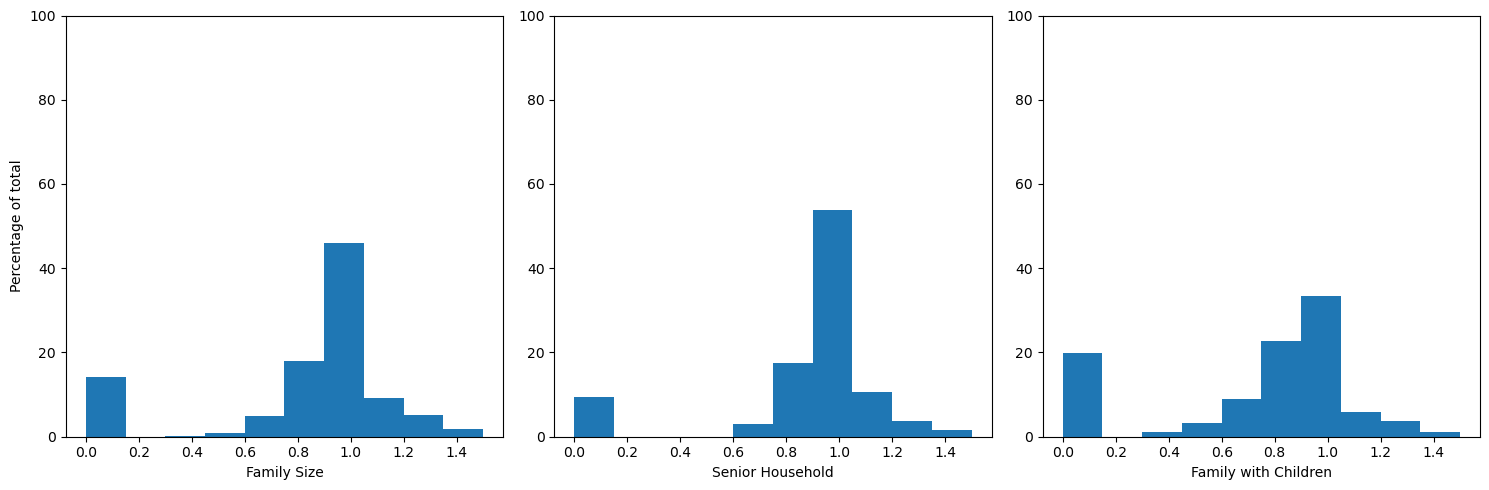

In [19]:
data1 = pivot_df['FAMILY_SIZE_DC']
data2 = pivot_df['SENIOR_STATUS_DC']
data3 = pivot_df['FAMTYPE_CHILDREN_DC']

counts1, bins1 = np.histogram(data1)
counts1 = counts1/counts1.sum()*100

counts2, bins2 = np.histogram(data2)
counts2 = counts2/counts2.sum()*100

counts3, bins3 = np.histogram(data3)
counts3 = counts3/counts3.sum()*100


plt.figure(figsize=(15,5))
plt.subplot(1,3,1)
plt.hist(bins1[:-1], bins1, weights=counts1)
plt.xlabel('Family Size')
plt.ylabel('Percentage of total')
plt.ylim(0,100)
plt.subplot(1,3,2)
plt.hist(bins2[:-1], bins2, weights=counts2)
plt.xlabel('Senior Household')
plt.ylim(0,100)
plt.subplot(1,3,3)
plt.hist(bins3[:-1], bins3, weights=counts3)
plt.xlabel('Family with Children')
plt.ylim(0,100)
plt.tight_layout()



plt.show()



In [20]:
pivot_df.to_csv('Families100m_pivot.csv', sep=',', encoding="cp1252")